# Data Analytics I

## Training and Test Samples

For the following analysis, we use a web-scraped used car offers from the online advertisement platform *myLemons* (credit goes to Anthony Strittmatter).  We restrict our sample to the compact cars BMW 320 series, Opel Astra, Mercedes C-class, VW Golf, and VW Passat. We select only used cars with a mileage between 10,000-200,000 km and an age between 1-20 years.

The data set contains the following variables:

|Variable name| Description|
|:----|:----|
|**Outcome variables** ||
|*first_price*| First asking price in 1,000 CHF |
|**Baseline covariates**| |
|*bmw_320, opel_astra, mercedes_c, vw_golf, vw_passat*| Dummies for the car producer and model|
|*mileage*| Mileage of the used car (in 1,000 km)|
|*age_car_years*| Age of the used car (in years)|
|*diesel*| Dummy for diesel engines |
|*private_seller*| Dummy for private seller (as opposed to professional used car sellers) |
|*other_car_owner*| Number of previous car owners |
|*guarantee*| Dummy indicating that the seller offers a guarantee for the used car|
|*maintenance_cert*| Dummy indicating that the seller has a complete maintenace certificate for the used car|
|*inspection*| Categorial variable for the duration until next general inspection (3 categories: new, 1-2 years, < 1 year) |
|*pm_green*| Dummy indicating that the used car has low particular matter emissions|
|*co2_em*| CO2 emssion (in g/km)|
|*euro_norm*| EURO emission norm under which the car is registered |


Furthermore, we generate some transformations of our covariates. The transformed covariates are:

|Variable name| Description|
|:----|:----|
|**Additional covariates** ||
|*mileage2, mileage3, mileage4, age_car_years2, age_car_years3, age_car_years4*| Squared, cubic, and quadratic *mileage* and *age_car_years* |
|*mile_20, mile_30, mile_40, mile_50, mile_100, mile_150*| Dummies indicating that the used car has a mileage above 20,000km, 30,000km, 40,000km, 50,000km, 100,000km, or 150,000km |
|*age_3, age_6*| Dummies indicating that the used car is above 3 or 6 years old |
|*dur_next_ins_0*| Dummy indicating that the duration until the next general inspection is less than a year |
|*dur_next_ins_1_2*| Dummy indicating that the duration until the next general inspection is between 1 and 2 years |
|*new_inspection*| Dummy indicating that the used car has a new general inspection |
|*euro_1, euro_2, euro_3, euro_4, euro_5, euro_6*| Dummies for EURO emission norms |

### Load Data 


In [29]:
###  Load Data  ###
# Set seed
set.seed(25112020)

# Load data frame
df_train <- read.csv("used_cars_train.csv",header=TRUE, sep=",") # Load training data
df_test <- read.csv("used_cars_test.csv",header=TRUE, sep=",") # Load test data

# Specify Outcome Variable
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])

# Specify Covariates
# First Variable is the Intercept
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))])) 

print('Data frame successfully loaded.')

[1] "Data frame successfully loaded."


### Estimation

We estimate different linear models by OLS. We start with model that contains only a constant. Then we increase the number of covariates succesively. For each model, we calculate the MSE in the training and test sample.


In [30]:
###  Estimation  ###

# Generate Matrices to Store the Results 
# (1) Matrix for the MSE: Rows = Models, Columns = In- and Out-of-sample MSE
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = 2)
# (2) Matrix for the in-sample predictions: Rows = Observations, Columns = Models
y_hat_train <- matrix(NA,nrow = nrow(first_price_train), ncol = ncol(covariates_train))
# (3) Matrix for the out-of-sample predictions: Rows = Observations, Columns = Models
y_hat_test <- matrix(NA,nrow = nrow(first_price_test), ncol = ncol(covariates_train))

# Estimate Different OLS Models
# Start with a model containing only an intercept
# Add covariates one-by-one
for (c in (1:ncol(covariates_train))){
  formular <- lm.fit(as.matrix(covariates_train[,c(1:c)]),first_price_train) # OLS regression
  y_hat_train[,c] <- formular$fitted.values # Fitted values in training sample
  coef <- as.matrix(formular$coefficients) # Store vector of coefficients
  coef[is.na(coef)] <- 0 # Replace NAs with 0 (in case of perfect multicollinearity)
  y_hat_test[,c] <- covariates_test[,c(1:c)] %*% coef # Fitted values in test sample
  mse[c,1] <- round(mean((y_hat_train[,c] - first_price_train)^2),digits=3) # in-sample MSE on the training sample
  mse[c,2] <- round(mean((y_hat_test[,c] - first_price_test)^2), digits=3) # out-of sample MSE on the test sample
}

# Add Column with Number of Covariates
mse <- data.frame(cbind(mse,seq(1,nrow(mse))))
colnames(mse) <- c("MSE.in", "MSE.out", "Covariates") # Give columnns names

print('Models are estimated.')

[1] "Models are estimated."


### In-sample MSE Plot - Training Sample

[1] "MSE for K = 1: 46.948"
[1] "MSE for K = 10: 9.819"
[1] "MSE for K = 40: 4.866"


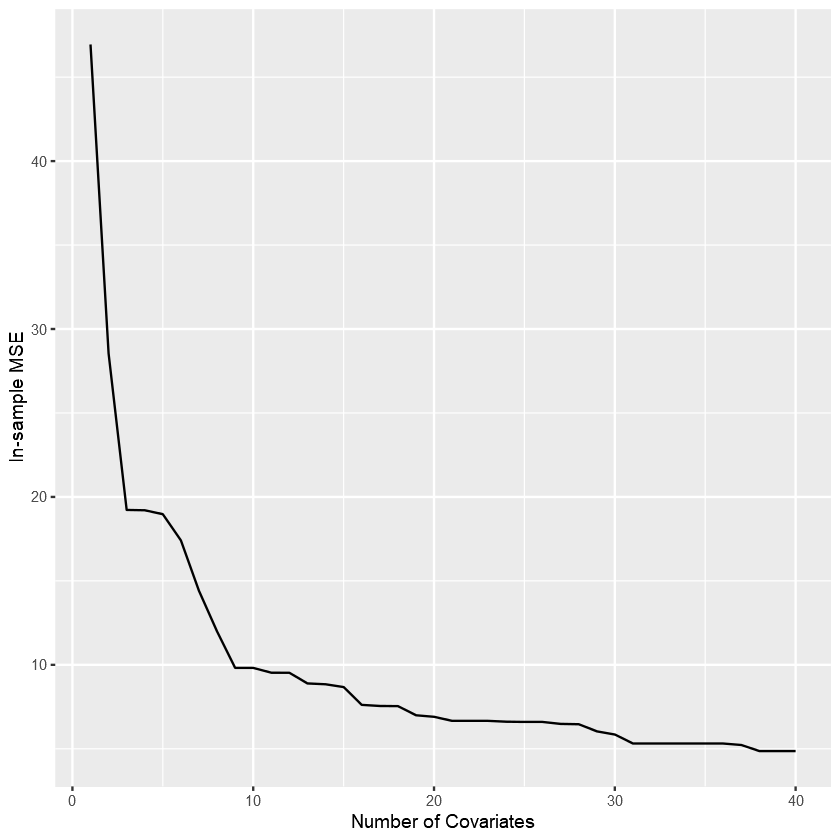

In [31]:
### In-sample MSE ###
library(ggplot2)
ggplot(mse, aes(x = Covariates, y = MSE.in)) +
    geom_line() +
    ylab("In-sample MSE") +
    xlab("Number of Covariates")

print(paste0("MSE for K = 1: ",mse[1,1]))
print(paste0("MSE for K = 10: ",mse[10,1]))
print(paste0("MSE for K = 40: ",mse[40,1]))

### Fit Plot - Training Sample

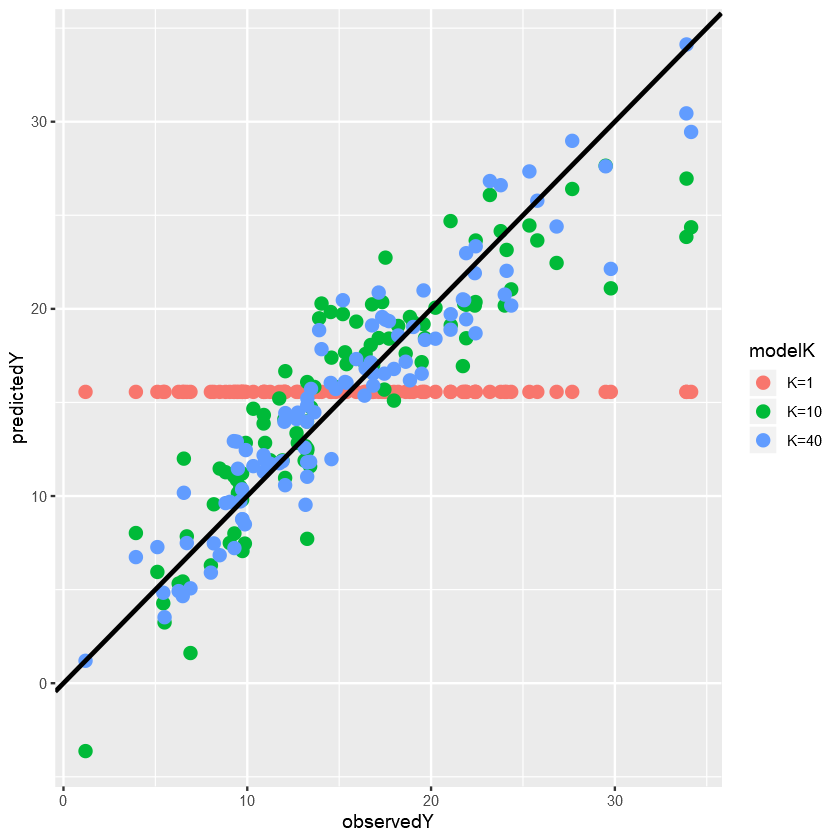

In [32]:
### Fit Plot - Training Sample ###

# Create data frame for plotting predictions from models with K = 1, K = 10 and K = 407
modelK <- c(rep("K=1",length(first_price_train)), rep("K=10",length(first_price_train)), rep("K=40",length(first_price_train)))
observedY <- c(rep(first_price_train, 3))
predictedY <- c(y_hat_train[,1], y_hat_train[,10], y_hat_train[,40])

fit.plot <- data.frame("observedY" = observedY, "predictedY" = predictedY, "modelK" = modelK)

# Plot
ggplot(fit.plot, aes(x=observedY, y = predictedY, col = modelK)) +
    geom_point(size = 3) +
    geom_abline(intercept = 0, slope = 1, color = "black", size = 1)

### Out-of-sample MSE - Test Sample

[1] "MSE for K = 1: 45.742"
[1] "MSE for K = 10: 8.222"
[1] "MSE for K = 40: 46.499"


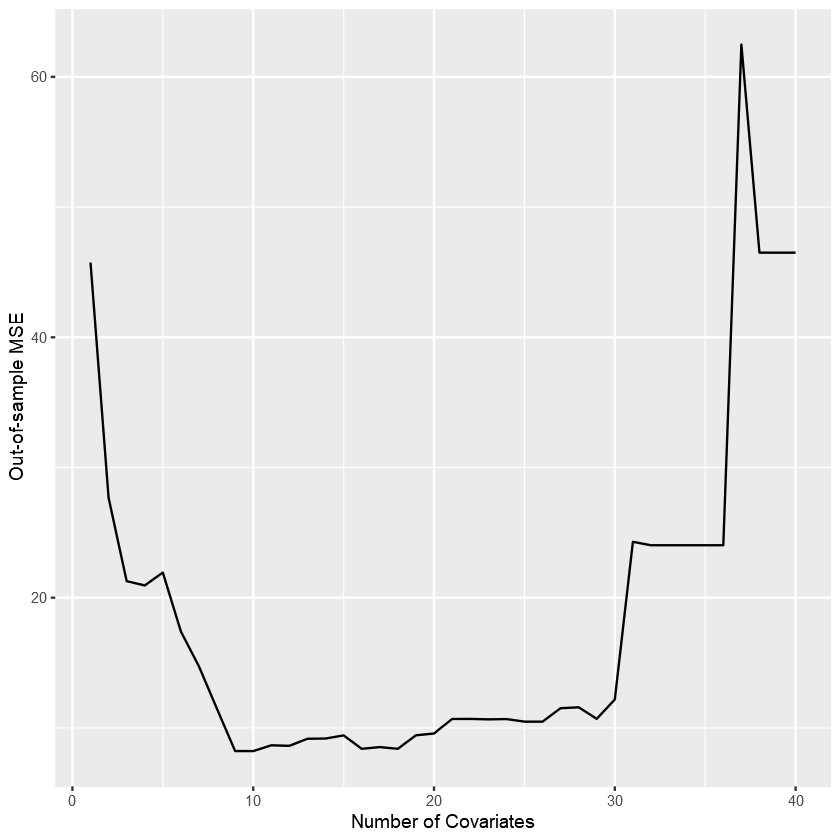

In [33]:
### Out-of-sample MSE ###
ggplot(mse, aes(x = Covariates, y = MSE.out)) +
    geom_line() +
    ylab("Out-of-sample MSE") +
    xlab("Number of Covariates")

print(paste0("MSE for K = 1: ",mse[1,2]))
print(paste0("MSE for K = 10: ",mse[10,2]))
print(paste0("MSE for K = 40: ",mse[40,2]))

### Fit Plot - Test Sample

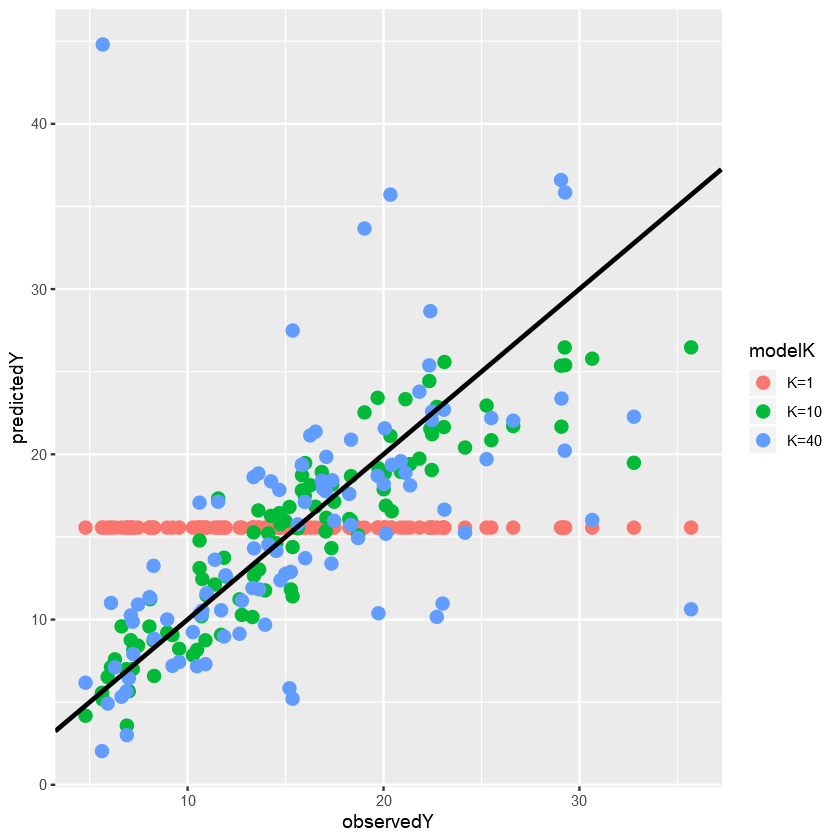

In [34]:
### Fit Plot - Test Sample ###

# Create data frame for plotting predictions from models with K = 1, K = 10 and K = 407
modelK <- c(rep("K=1",length(first_price_test)), rep("K=10",length(first_price_test)), rep("K=40",length(first_price_test)))
observedY <- c(rep(first_price_test, 3))
predictedY <- c(y_hat_test[,1], y_hat_test[,10], y_hat_test[,40])

fit.plot <- data.frame("observedY" = observedY, "predictedY" = predictedY, "modelK" = modelK)

# Plot
ggplot(fit.plot, aes(x=observedY, y = predictedY, col = modelK)) +
    geom_point(size = 3) +
    geom_abline(intercept = 0, slope = 1, color = "black", size = 1)

## Simulation of Bias-Variance Trade-Off

We load a large data set from *myLemons* with 104,721 observations and the same covariates as above. We take one observation to the test sample. We simulate the used car prices with the linear model
\begin{equation*}
price =  X\beta_0 + \epsilon,
\end{equation*}
where $\beta_0$ is obtained from OLS estimates in the real data and $\epsilon \sim N(0,sd^2)$ (with $sd = 3$) adds artifical noise to the DGP. We subsample the data in $sub = 1500$ partitions.

For each subsample, we estimate an OLS model on the simulated price. We add covariates successively. We start with a model containing only a constant. The final model contains all observable covariates. We calulate the MSE, squared-bias, and variance accross all simulations for each size of the linear model,
\begin{equation*}
MSE = Var(\hat{Y}) + Bias(\hat{Y})^2 + Var(\epsilon).
\end{equation*}

,Model,Variable,Value
,<int>,<fct>,<dbl>
1,1,Variance,0.2296645
2,2,Variance,0.2126174
3,3,Variance,0.2673391
4,4,Variance,0.5899487
5,5,Variance,1.5261464
6,6,Variance,1.9848546


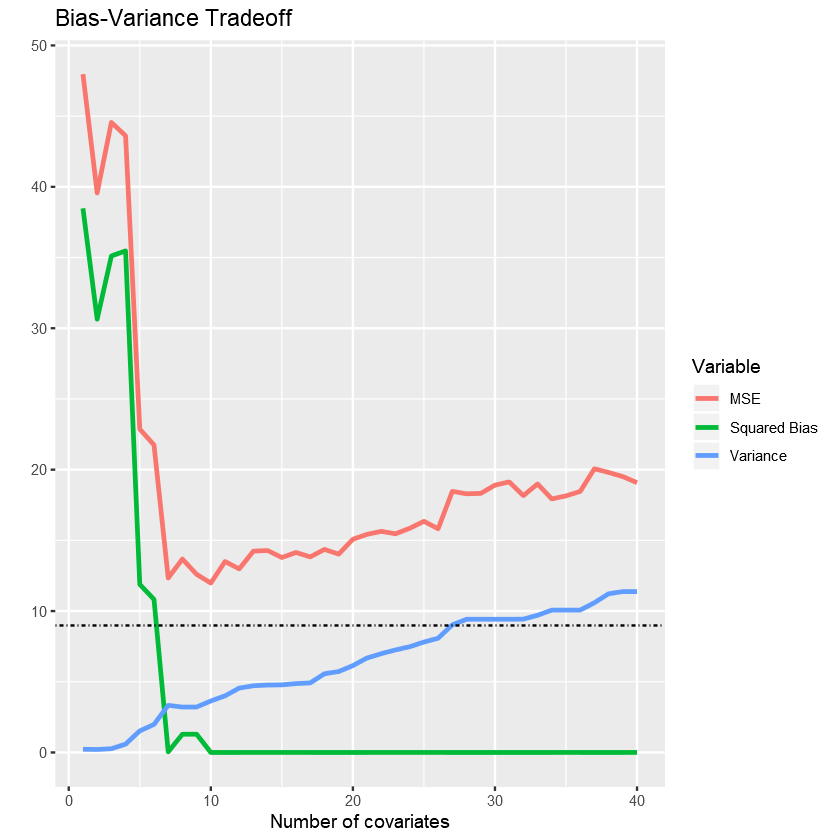

In [35]:
############################# Simulation of Bias-Variance Trade-Off ############################# 

# Load data
data_raw <- read.csv("mylemon.csv",header=TRUE, sep=",") # Load larger data set

# Set starting values for random number generator
set.seed(100001)

# Split data
df_train <- data_raw[-1,] # drops the first observation -> training samples will be drawn from here
df_test <- data_raw[1,] # contains only the first observation -> test set

# Generate the DGP -> (1) Take 10 real covariates, (2) Choose their beta coefficients, (3) Simulate response
# (1) All covariates -> the first ten will generate the response
covariates_train <- as.matrix(cbind(rep(1,nrow(df_train)),df_train[,c(3:ncol(df_train))]))
covariates_test <- as.matrix(cbind(rep(1,nrow(df_test)),df_test[,c(3:ncol(df_test))]))

# (2) Beta - take the empirical OLS coefficients from the full model (= all covariates)
# Get Outcome
first_price_train <- as.matrix(df_train[,2])
first_price_test <- as.matrix(df_test[,2])
# Estimate the empirical coefficients for the first ten covariates
formular <- lm.fit(rbind(covariates_train[,c(1:10)],covariates_test[,c(1:10)]),rbind(first_price_train,first_price_test))
coef <- as.matrix(formular$coefficients) # Beta_0
coef[is.na(coef)] <- 0 # Fix multicollineraity issue

# (3) Simulate the car price based on empirical coefficients, observed covariates, and noise
# Noise
sd = 3 # sd of the irreducible noise
u_tr <- matrix(rnorm(nrow(first_price_train),0,sd),nrow= nrow(first_price_train), ncol =1) # Irreducible noise
# Simulate the price based on empricial coeffcents, observed covariates, and noise
y_new_train <- covariates_train[,c(1:10)] %*% coef  + u_tr # Simulated response for future training sets
# De-noised true response on the test set
y_0 <- covariates_test[,c(1:10)] %*% coef 

# Set input parameters for the simulation
# (1) number of subsamples:
sub = 1500
# (2) each of the 1500 training sets has 70 random observations from the df_train:
p <- matrix(sample(seq(1,nrow(df_train)), 70*sub, replace = TRUE), ncol = sub) # each column contains 70 row indices

# Estimate different OLS models on simulated price
mse <- matrix(NA, nrow = ncol(covariates_train), ncol = sub) # Out-of-sample MSE, Rows = models, Columns = subsamples
y_hat_test <- matrix(NA, nrow = ncol(covariates_train), ncol = sub) # Predictions, Rows = models, Columns = subsamples
for (n in (1:sub)) { # Loop over subsamples
    for (c in (1:ncol(covariates_train))){ # Loop over OLS models with different number of covariates
        formular <- lm.fit(as.matrix(covariates_train[p[,n],c(1:c)]),y_new_train[p[,n],]) # Model for the 70 observations
        coef <- as.matrix(formular$coefficients) # Hat Beta
        coef[is.na(coef)] <- 0
        y_hat_test[c,n] <- covariates_test[,c(1:c)] %*% coef # Predicted y for the test set
        mse[c,n] <- mean((y_hat_test[c,n] - y_0 - rnorm(1,0,sd))^2) # MSE = mean(predicton - observed)^2 and observed = true response + noise
    }
}

# Aggregate results accross all subsamples
test <- matrix(NA, nrow = ncol(covariates_train), ncol = 3) # Rows = models, columns = [Var(hat f), bias^2(hat f), MSE]
for (c in (1:ncol(covariates_train))){
    test[c,1] <- var(y_hat_test[c,])
    test[c,2] <- (mean(y_hat_test[c,]) - y_0)^2
    test[c,3] <- mean(mse[c,]) 
}
colnames(test) <- c("Variance", "Squared Bias", "MSE") # Column names for structure "test"

# Data frame for plot
library(reshape)
test <- melt(test) # Reshape data for the plot
colnames(test) <- c("Model", "Variable", "Value") # New column names
head(test)

ggplot(test, aes(x=Model, y= Value, col = Variable)) +
  geom_line(size = 1) +
  xlab("Number of covariates") +
  ylab("") +
  geom_hline(yintercept = sd^2, linetype=4) +
  ggtitle("Bias-Variance Tradeoff")